In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
train = pd.read_csv("HR_Train.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
print(f"The Shape : {train.shape}")

The Shape : (54808, 14)


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


## The meaning of each column in the given dataset:

#### employee_id: It represents the unique identifier for each employee in the dataset.

#### department: It refers to the department or division in which the employee works.

#### region: It represents the region or location where the employee is stationed.

#### education: It indicates the educational qualification of the employee.

#### gender: It specifies the gender of the employee.

#### recruitment_channel: It denotes the channel or method through which the employee was recruited.

#### no_of_trainings: It represents the number of training programs attended by the employee in the past.

#### age: It indicates the age of the employee.

#### previous_year_rating: It signifies the performance rating received by the employee in the previous year.

#### length_of_service: It represents the total number of years the employee has been in service.

#### KPIs_met >80%: It is a binary variable that indicates whether the employee has met Key Performance Indicators (KPIs) by achieving a score greater than 80% (Yes/No).

#### awards_won?: It is a binary variable that indicates whether the employee has won any awards (Yes/No).

#### avg_training_score: It represents the average training score of the employee.

#### is_promoted: It is the target variable that indicates whether the employee was promoted or not (1 if promoted, 0 if not promoted).

## Explore Data

In [8]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

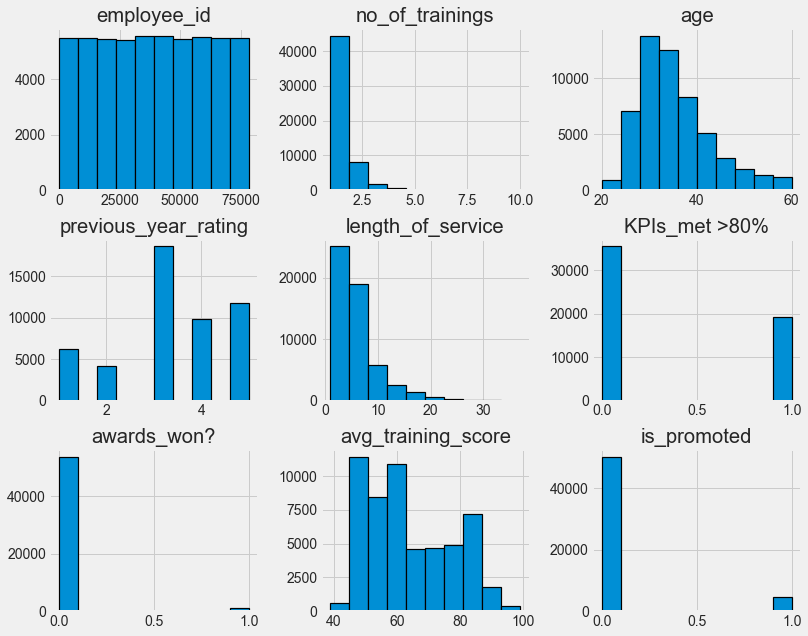

In [9]:
# Visulazing the distibution of the data for every feature
train.hist(edgecolor="black", linewidth=1.2, figsize=(12, 10))
plt.show()

In [10]:
# plt.figure(figsize=(20,20))
# sns.pairplot(train.iloc[:,1:])

## Cleaning Data

In [11]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

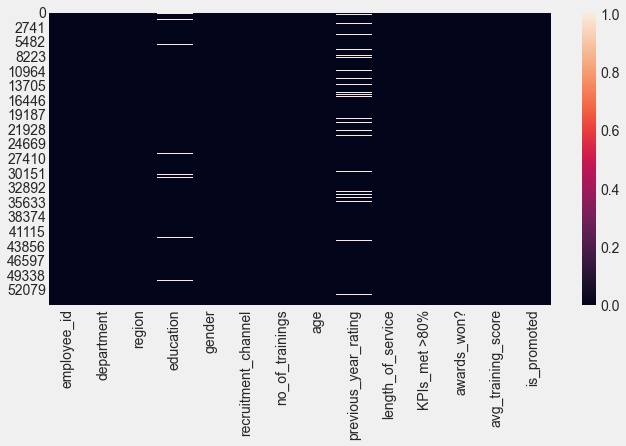

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(train.isna())

In [13]:
train["education"] = train["education"].fillna("Bachelor's")
train["previous_year_rating"] = train["previous_year_rating"].fillna(3.0)

In [14]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
print("No. of Duplicated Values : {0:2f}".format(train.duplicated().sum()))

No. of Duplicated Values : 0.000000


c:\Users\TECHNO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


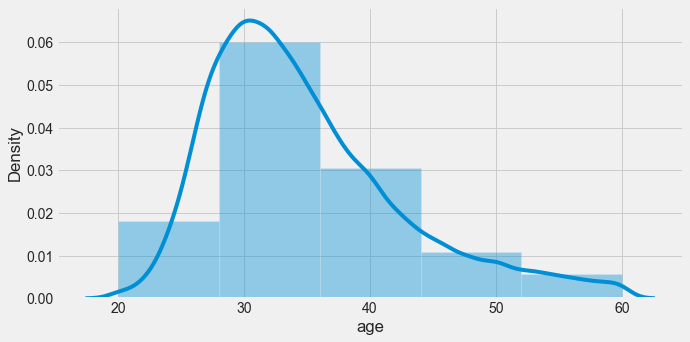

In [16]:
plt.figure(figsize=(10, 5))
sns.distplot(train.age, bins=5)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

c:\Users\TECHNO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


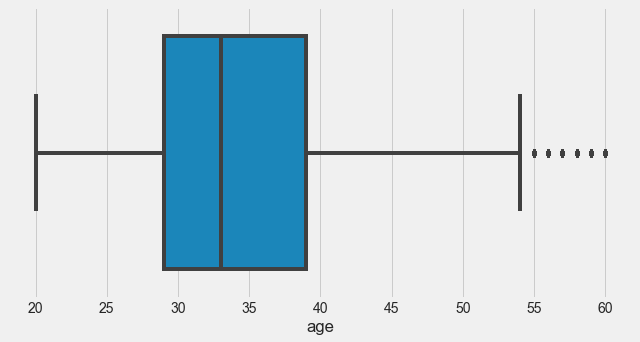

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(train.age)
plt.show()

In [19]:
q1 = train["age"].quantile(0.25)
q3 = train["age"].quantile(0.75)
iqr = q3 - q1
outliers = q3 + 1.5 * iqr

outliers

54.0

In [20]:
len(train[train["age"] > outliers]) / len(train) * 100

2.618230915194862

In [21]:
train = train[train["age"] <= outliers]
train.shape

(53373, 14)

In [22]:
# train.to_csv('cleaned_HR_Dataset.csv')

## Preproccesing

In [23]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [29]:
train = train.drop(["employee_id", "region"], axis=1)

In [30]:
X = train.drop(["is_promoted"], axis=1)
y = train["is_promoted"]

In [32]:
X.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [33]:
from sklearn.preprocessing import LabelEncoder

In [44]:
X_cat = pd.get_dummies(X.select_dtypes(include="object"))
X_cat = X_cat.drop(["gender_f"], axis=1)
X_num = X.select_dtypes(exclude="object")
X = pd.concat([X_cat, X_num], axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [47]:
X = scale.fit_transform(X)

In [76]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, train_size=0.8
)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [128]:
def mymodel(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    metrix = confusion_matrix(y_test, y_pred)
    print(f"Training_Accuracy : {train}\n Testing_Accuracy : {test}")
    print(f"Classification Report :\n", classification_report(y_test, y_pred))
    sns.heatmap(metrix, annot=True, fmt=".5g", cmap="coolwarm")
    return model

Training_Accuracy : 0.9328539978453323
 Testing_Accuracy : 0.9297423887587822
Classification Report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      9722
           1       0.85      0.26      0.40       953

    accuracy                           0.93     10675
   macro avg       0.89      0.63      0.68     10675
weighted avg       0.92      0.93      0.91     10675



LogisticRegression()

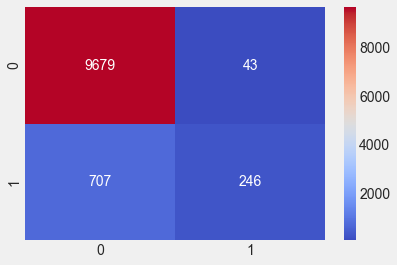

In [129]:
mymodel(LogisticRegression())

Training_Accuracy : 0.9347042016019486
 Testing_Accuracy : 0.917096018735363
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      9722
           1       0.61      0.20      0.30       953

    accuracy                           0.92     10675
   macro avg       0.77      0.59      0.63     10675
weighted avg       0.90      0.92      0.90     10675



KNeighborsClassifier()

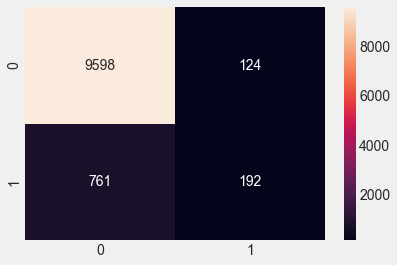

In [127]:
mymodel(KNeighborsClassifier())

In [115]:
mymodel(DecisionTreeClassifier())

Accuracy : 0.8958313817330211
Training_Accuracy : 0.9965806360953675
 Testing_Accuracy : 0.8958313817330211
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      9722
           1       0.42      0.47      0.45       953

    accuracy                           0.90     10675
   macro avg       0.69      0.70      0.69     10675
weighted avg       0.90      0.90      0.90     10675

confusion_matrix :
 [[9113  609]
 [ 503  450]]


DecisionTreeClassifier()

In [116]:
mymodel(RandomForestClassifier())

Accuracy : 0.9305854800936768
Training_Accuracy : 0.9965103751932175
 Testing_Accuracy : 0.9305854800936768
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9722
           1       0.72      0.36      0.48       953

    accuracy                           0.93     10675
   macro avg       0.83      0.67      0.72     10675
weighted avg       0.92      0.93      0.92     10675

confusion_matrix :
 [[9591  131]
 [ 610  343]]


RandomForestClassifier()